In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
print(cv2. __version__)
print(np.__version__)

4.10.0
1.26.4


In [3]:
img = cv2.imread('Laplace.png', -1)
img.shape

(1200, 746)

In [4]:
def plot_two(original, new):
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray', vmin=0, vmax=255)

    plt.subplot(1, 2, 2)
    plt.title('Filtered Image')
    plt.imshow(new, cmap='gray', vmin=0, vmax=255)

**Filtering Methods**

Low pass filters and high pass filters. Low pass filters smooth/blur images, high pass filters detect edges.

**Mean filter**

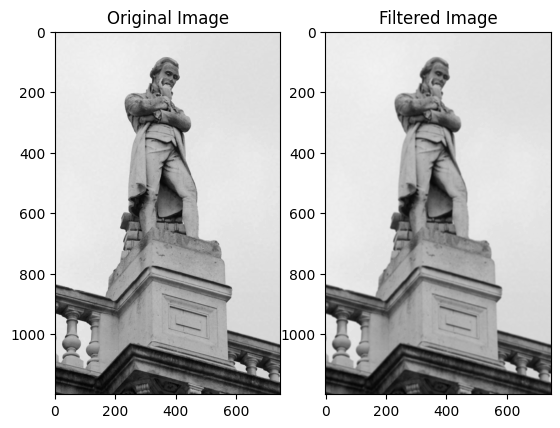

In [5]:
mean_img = cv2.blur(img, (5,5))
plot_two(img, mean_img)

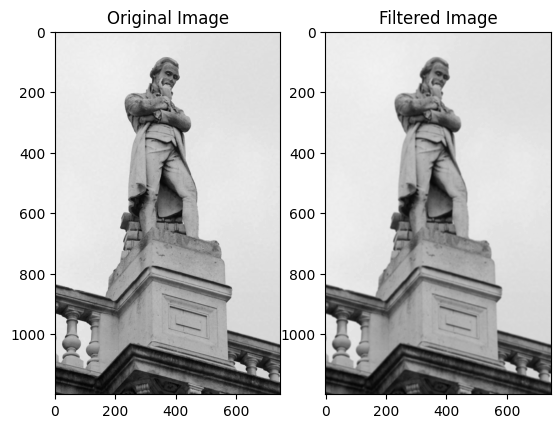

In [6]:
ones = np.ones((5,5)) / 25
mean_img = cv2.filter2D(src = img.astype(np.float64), ddepth = cv2.CV_64F, kernel = ones)
plot_two(img, mean_img)

**Median Filtering**

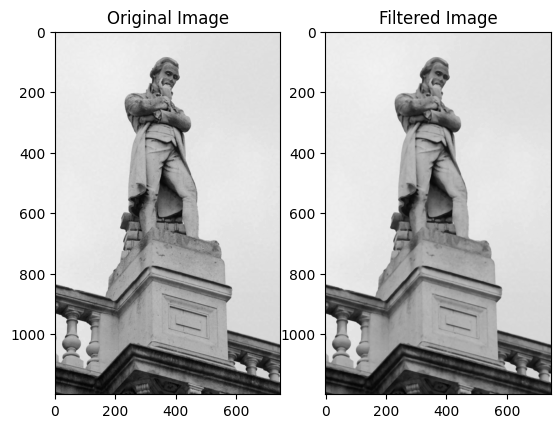

In [7]:
median_img = cv2.medianBlur(img, 5)
plot_two(img, median_img)

**Gaussian Blur**

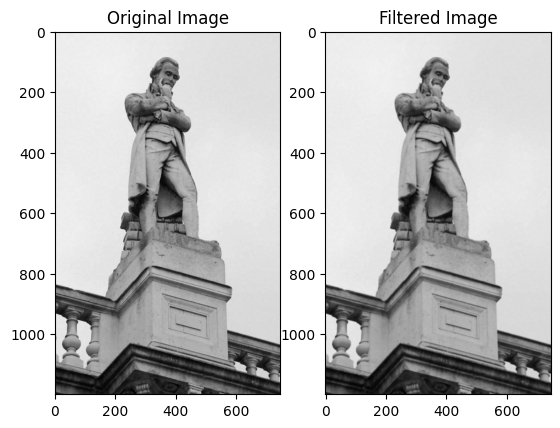

In [9]:
gaussian_img = cv2.GaussianBlur(img,(5,5),-4)
plot_two(img, gaussian_img)

**Laplacian Filtering**

In [7]:
def myconv(image, kernel):
    m = kernel.shape[0]
    ret = np.zeros(image.shape)
    tmp = np.zeros((m+image.shape[0]-1, m+image.shape[1]-1))
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            tmp[i, j] = image[i-1, j-1]
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            ret[i, j] = np.sum(tmp[i:i+m, j:j+m] * kernel)
            ret[i, j] = max(min(255, ret[i, j]), 0)
    #ret = np.uint8(ret)
    return ret.astype('uint8')

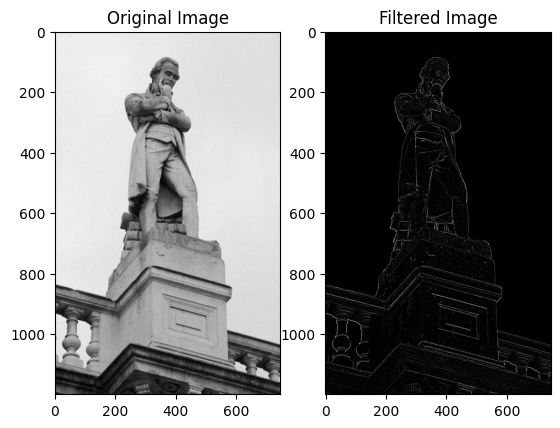

In [8]:
kernel = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])

# lap = cv2.filter2D(src = img.astype(np.float64), ddepth = cv2.CV_64F, kernel = kernel)

lap = myconv(img, kernel)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(lap, cmap='gray', vmin=0, vmax=255)


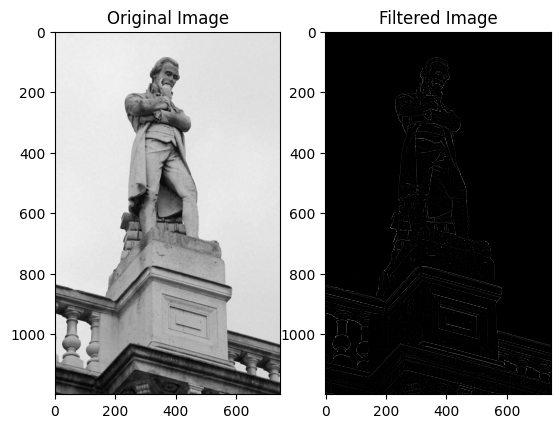

In [9]:
kernel = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])

lap = cv2.filter2D(src = img.astype(np.float64), ddepth = cv2.CV_64F, kernel = kernel)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(lap, cmap='gray', vmin=0, vmax=255)
